In [1]:
import polars as pl
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# UC Housing Data

In [2]:
df_2bdr = pl.read_csv('../data/2bdr.csv')
df_2bdr

Year,Oakland-Fremont,San Francisco,Santa Cruz,Merced,Los Angeles,Davis,Irvine,Riverside,San Diego,Santa Barbara
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2019,2126,3170,2439,839,1791,1342,2037,1232,2460,1951
2020,2239,3339,2519,947,1956,1404,2216,1289,2570,2324
2021,2383,3553,3021,1067,2058,1511,2331,1390,2630,2374
2022,2274,3198,3138,1120,2044,1684,2324,1509,2710,2516
2023,2405,3188,3293,1243,2222,1851,2539,1751,2940,2667


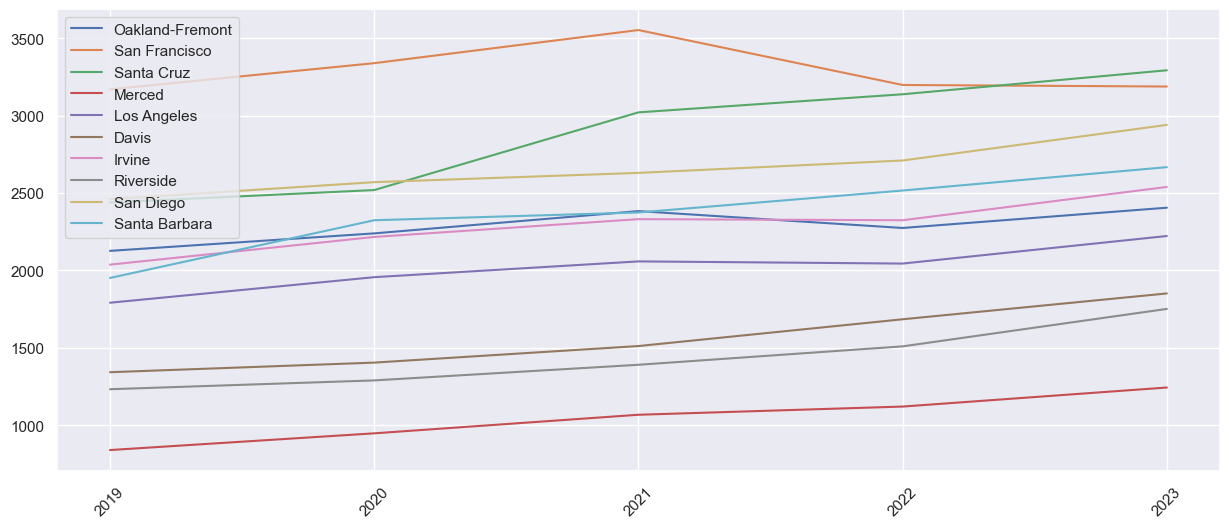

In [3]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 6)

for col in df_2bdr.select(pl.all().exclude('Year')).columns:
    plt.plot(df_2bdr['Year'], df_2bdr[col], label=f'{col}')

ax.legend()
plt.xticks(df_2bdr['Year'], rotation=45)
plt.show()


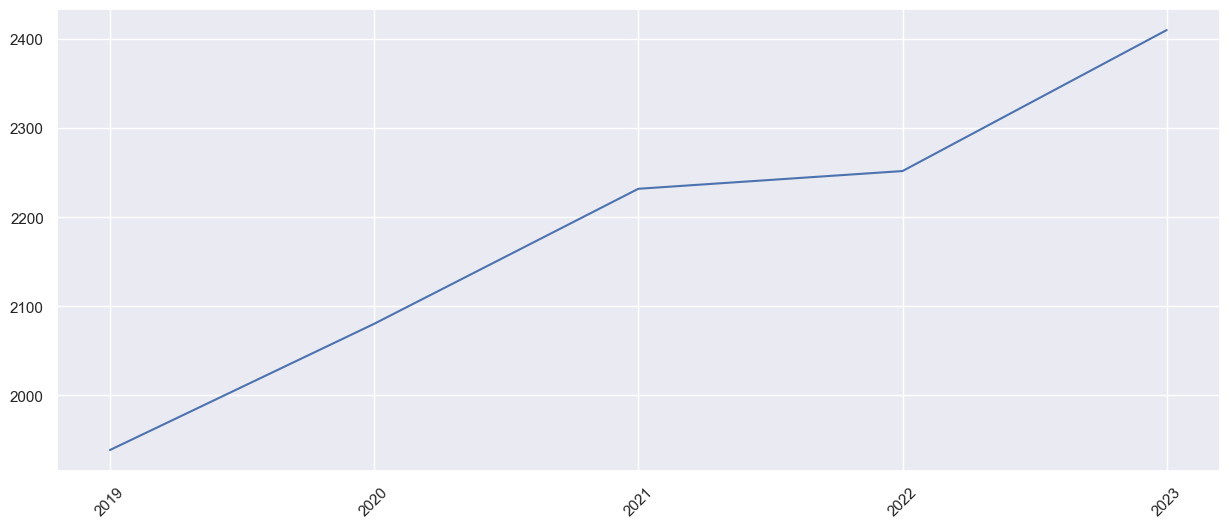

In [4]:
avg_yearly_change = df_2bdr.select([
    pl.col('Year'),
    pl.concat_list(pl.all().exclude('Year')).arr.eval(pl.element().mean()).arr.first().alias('AvgCost'),
])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 6)
plt.plot(avg_yearly_change['Year'], avg_yearly_change['AvgCost'])
plt.xticks(avg_yearly_change['Year'], rotation=45)
plt.show()

/var/folders/sn/b7hd1bmd569cjwgmtww4mv440000gn/T/ipykernel_74470/2698104104.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


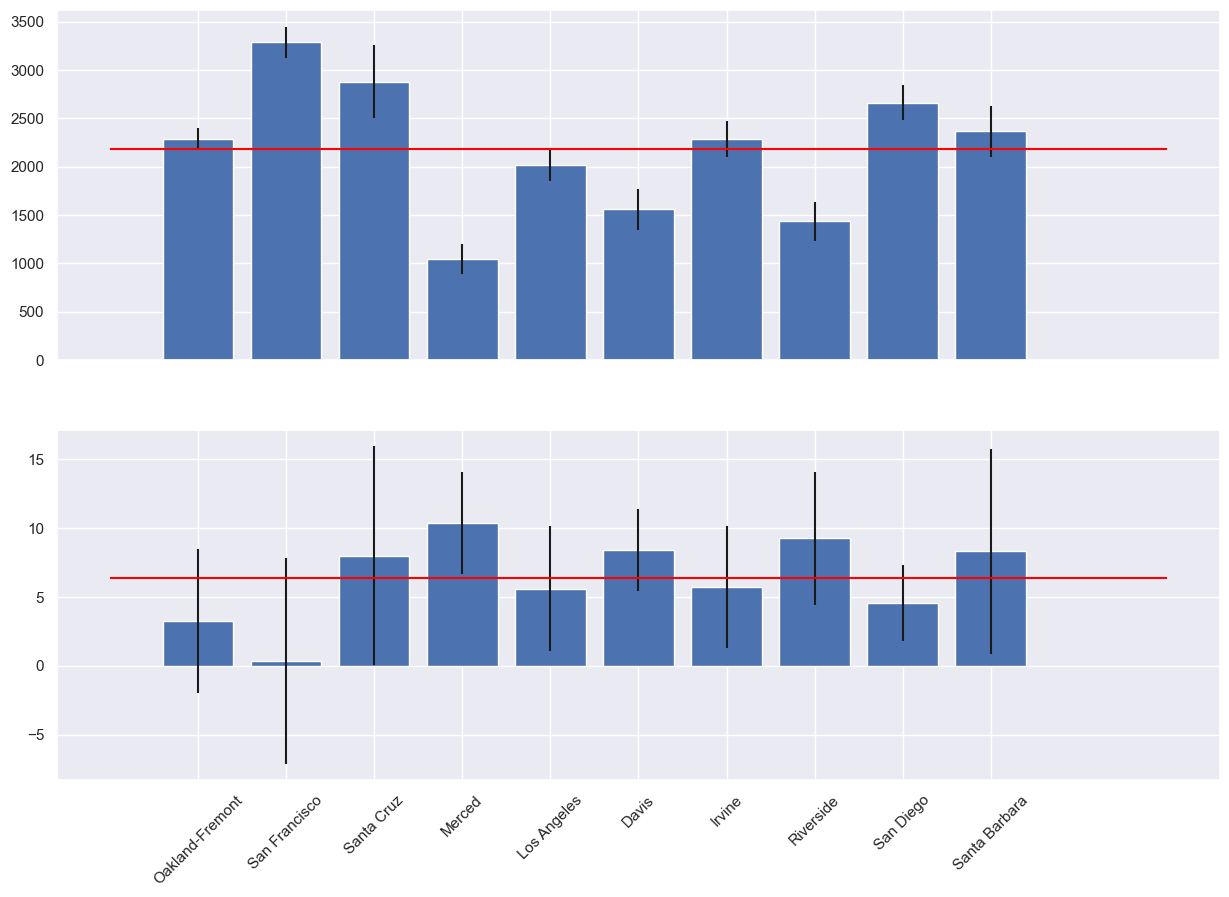

In [5]:
df_avg_cost_change = pl.concat([
    df_2bdr.select(pl.all().exclude('Year').mean().round(2)),
    df_2bdr.select(pl.all().exclude('Year').std().round(2)),
    df_2bdr.select((pl.all().exclude('Year').pct_change() * 100).mean().round(2)),
    df_2bdr.select((pl.all().exclude('Year').pct_change() * 100).std().round(2)),
], rechunk=True)


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True) # frameon=False removes frames
fig.set_size_inches(15, 10)

ax1.bar(df_avg_cost_change.columns, df_avg_cost_change.row(0), yerr=df_avg_cost_change.row(1))
ax1.hlines(np.mean(df_avg_cost_change.row(0)), -1, 11, colors='red')

ax2.bar(df_avg_cost_change.columns, df_avg_cost_change.row(2), yerr=df_avg_cost_change.row(3))
ax2.hlines(np.mean(df_avg_cost_change.row(2)), -1, 11, colors='red')

plt.xticks(rotation=45)

fig.show()

In [6]:
df_avg_cost_change

Oakland-Fremont,San Francisco,Santa Cruz,Merced,Los Angeles,Davis,Irvine,Riverside,San Diego,Santa Barbara
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2285.4,3289.6,2882.0,1043.2,2014.2,1558.4,2289.4,1434.2,2662.0,2366.4
113.49,161.89,381.38,155.99,157.47,208.75,183.25,206.08,180.19,267.93
3.23,0.36,8.01,10.37,5.61,8.4,5.73,9.27,4.58,8.31
5.23,7.5,7.98,3.7,4.56,2.97,4.41,4.83,2.75,7.43


In [7]:
np.corrcoef(df_avg_cost_change.row(0), df_avg_cost_change.row(2))

array([[ 1.        , -0.74757451],
       [-0.74757451,  1.        ]])

### Should we accept a 3%, 7%? What should the quantity be?

Probability of that year's increase in cost of living is greater than 7%

In [8]:
p = 0.95

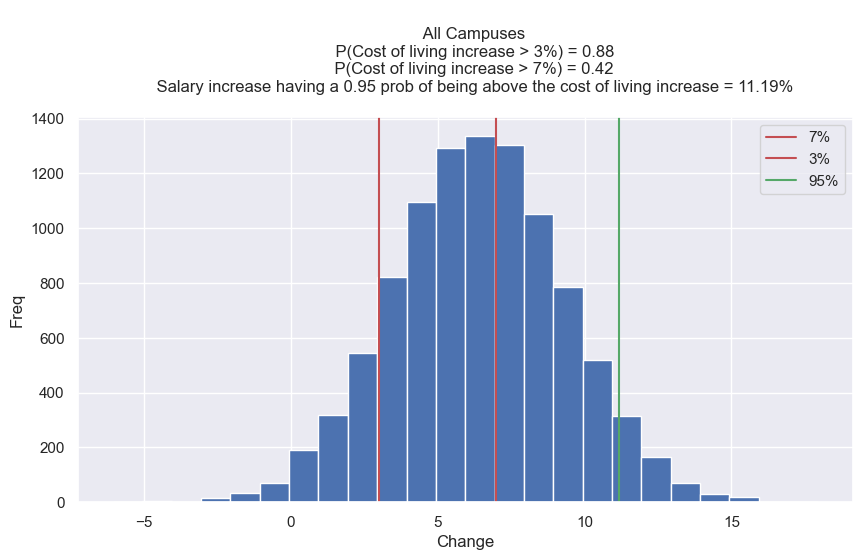

In [9]:
housing_cost = df_avg_cost_change.row(2)
avg_housing_cost = np.mean(housing_cost).round(2)
std_housing_cost = np.std(housing_cost).round(2)

sample = norm.rvs(
    loc=avg_housing_cost, 
    scale=std_housing_cost, 
    size=10_000, 
    random_state=42
)

ppf = np.round(norm.ppf(p, loc=avg_housing_cost, scale=std_housing_cost), 2)

fig, axs = plt.subplots(1)
fig.set_size_inches(10, 5)

axs.hist(sample, bins=np.arange(min(sample)-1, max(sample)+1, 1))
axs.axvline(x=7, color='r', label='7%')
axs.axvline(x=3, color='r', label='3%')
axs.axvline(x=ppf, color='g', label='95%')

axs.set_xlabel('Change')
axs.set_ylabel('Freq')
axs.set_title(f'''
    All Campuses
    P(Cost of living increase > 3%) = {np.round(norm.sf(3, avg_housing_cost, std_housing_cost), 2)}
    P(Cost of living increase > 7%) = {np.round(norm.sf(7, avg_housing_cost, std_housing_cost), 2)}
    Salary increase having a {p} prob of being above the cost of living increase = {ppf}%
''')

axs.legend()
plt.show()

/var/folders/sn/b7hd1bmd569cjwgmtww4mv440000gn/T/ipykernel_74470/2310785614.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


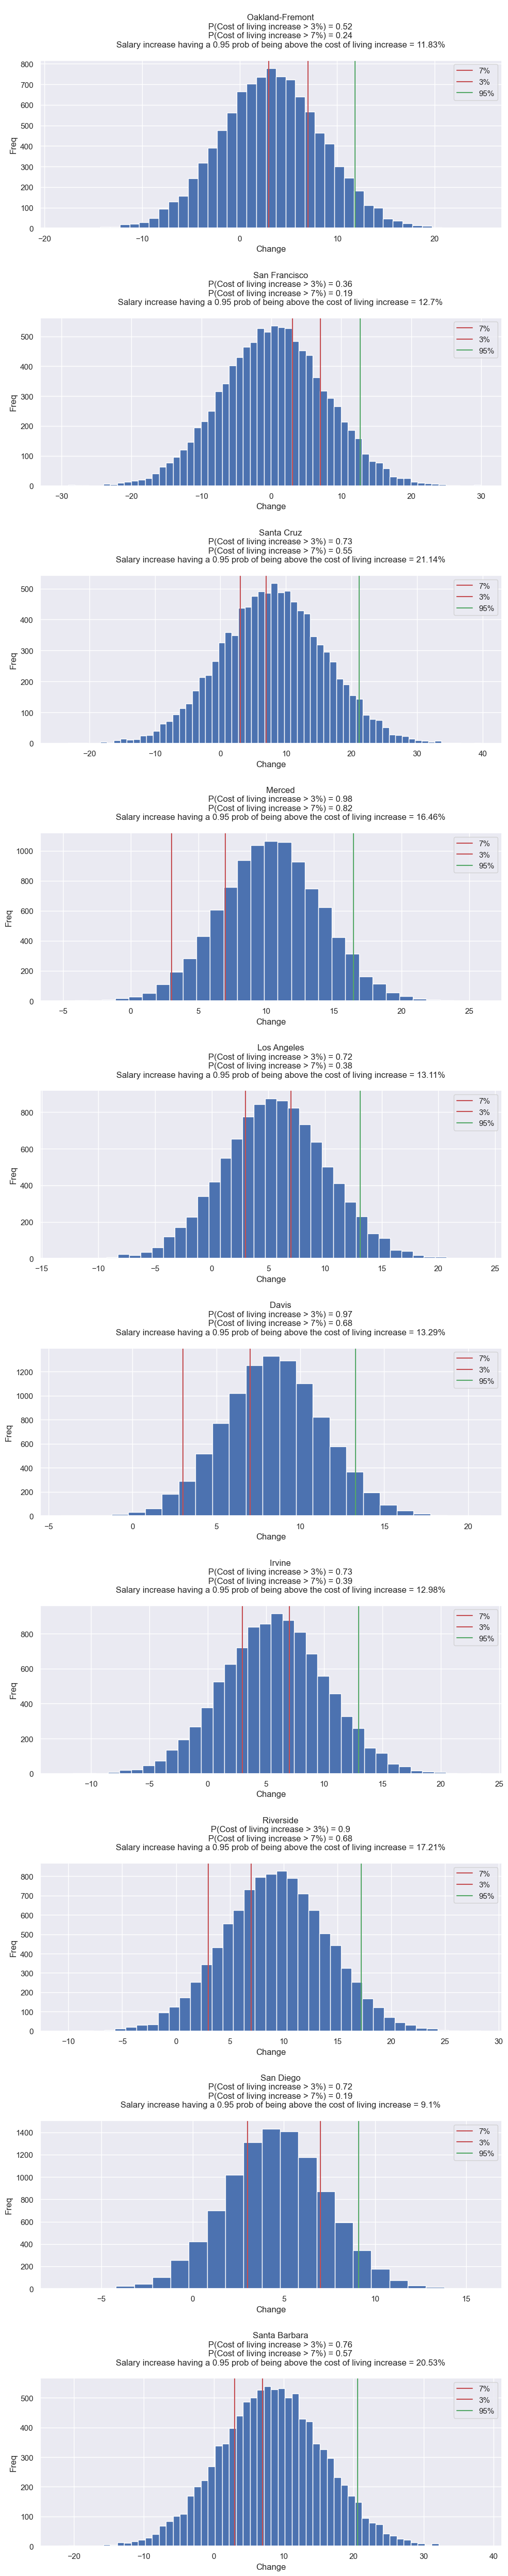

In [10]:

n = len(df_avg_cost_change.columns)

fig, axs = plt.subplots(n, 1, tight_layout=True)
fig.set_size_inches(10, n*5)
axs = axs.flatten()

for i, col in enumerate(df_avg_cost_change.columns):

    loc = df_avg_cost_change[col][2]
    scale = df_avg_cost_change[col][3]

    sample = norm.rvs(
        loc=loc, 
        scale=scale, 
        size=10_000, 
        random_state=42
    )

    ppf = np.round(norm.ppf(p, loc=loc, scale=scale), 2)

    axs[i].hist(sample, bins=np.arange(min(sample)-1, max(sample)+1, 1))
    axs[i].axvline(x=7, color='r', label='7%')
    axs[i].axvline(x=3, color='r', label='3%')
    axs[i].axvline(x=ppf, color='g', label='95%')

    axs[i].set_xlabel('Change')
    axs[i].set_ylabel('Freq')
    axs[i].set_title(f'''
        {col}
        P(Cost of living increase > 3%) = {np.round(norm.sf(3, loc, scale), 2)}
        P(Cost of living increase > 7%) = {np.round(norm.sf(7, loc, scale), 2)}
        Salary increase having a {p} prob of being above the cost of living increase = {ppf}%
    ''')

    axs[i].legend()


fig.show()

# Standardized

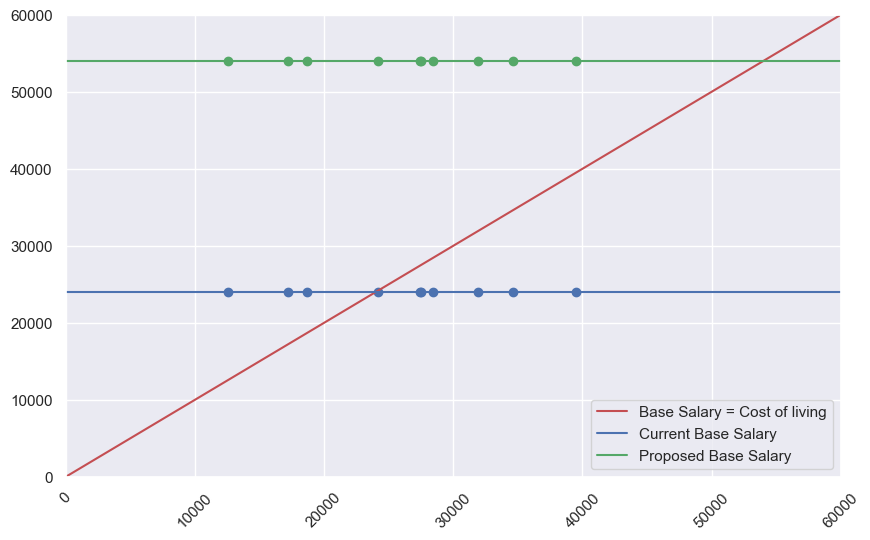

In [11]:
current_base_salary = 24_000
proposed_base_salary = 54_000

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax.axline([-1, -1], [1, 1], color='r', label='Base Salary = Cost of living')
ax.axhline(y=current_base_salary, color='b', label='Current Base Salary')
ax.axhline(y=proposed_base_salary, color='g', label='Proposed Base Salary')

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = [current_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='b')

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = [proposed_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='g')

ax.set(xlim=(0, 60_000), ylim=(0, 60_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()

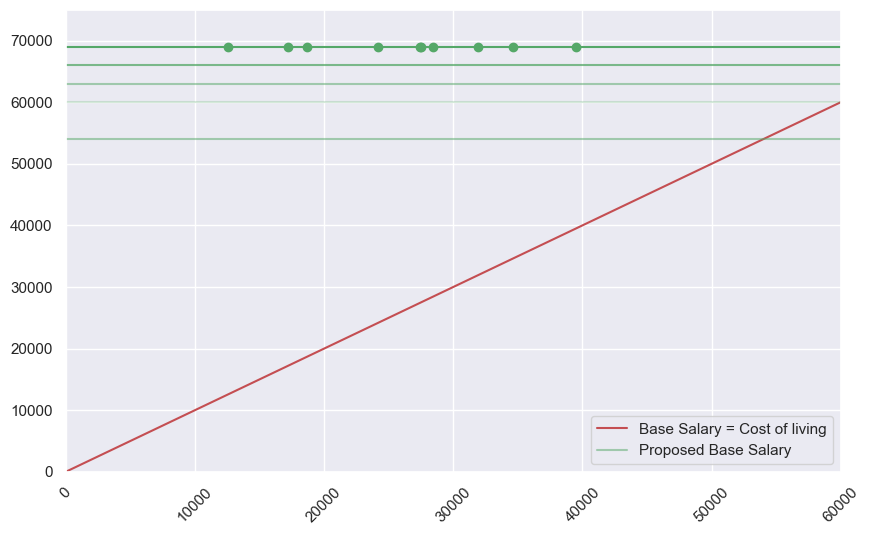

In [12]:
current_base_salary = 24_000
proposed_base_salary = 54_000

yearly_increase = 3000

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax.axline([-1, -1], [1, 1], color='r', label='Base Salary = Cost of living')
ax.axhline(y=proposed_base_salary, color='g', label='Proposed Base Salary', alpha=0.5)


n = 5
alphas = np.linspace(0, 1, n)
cum_yearly_increase = yearly_increase

for (i, alpha) in enumerate(alphas):
    proposed_base_salary += yearly_increase
    ax.axhline(y=proposed_base_salary, color='g', alpha=alphas[i])

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = [proposed_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='g')

ax.set(xlim=(0, 60_000), ylim=(0, 75_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()

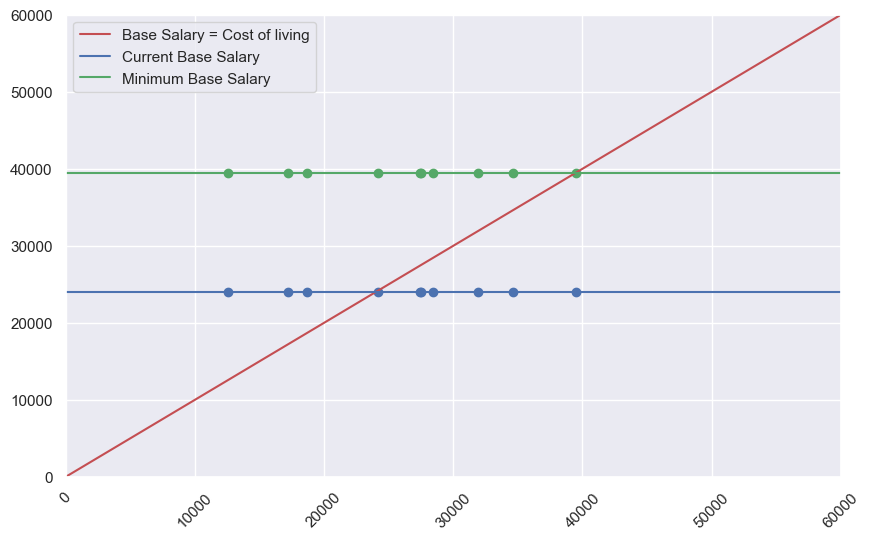

In [13]:
current_base_salary = 24_000
proposed_base_salary = 54_000

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax.axline([-1, -1], [1, 1], color='r', label='Base Salary = Cost of living')
ax.axhline(y=current_base_salary, color='b', label='Current Base Salary')


compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = [current_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='b')

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = [max(x)] * len(x)
plt.scatter(x, y, marker='o', color='g')
ax.axhline(y=max(x), color='g', label='Minimum Base Salary')

ax.set(xlim=(0, 60_000), ylim=(0, 60_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()

# Localized

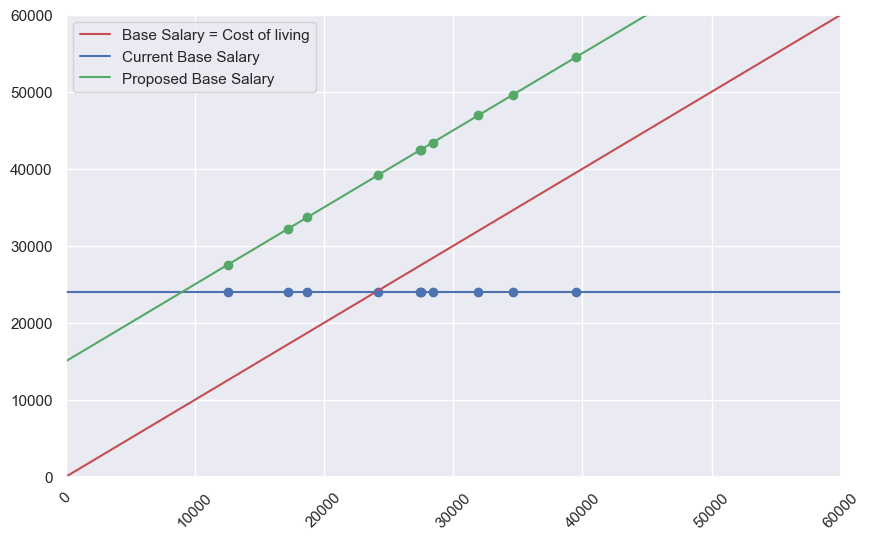

In [14]:
increase = 15_000

monthly_housing_cost = df_avg_cost_change.row(0)
yearly_housing_cost = np.array(monthly_housing_cost) * 12

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax.axline([0, 0], [1, 1], color='r', label='Base Salary = Cost of living')
ax.axhline(y=current_base_salary, color='b', label='Current Base Salary')
ax.axline([0, increase], [1, increase+1], color='g', label='Proposed Base Salary')

compus_name = df_avg_cost_change.columns
x = yearly_housing_cost
y = [current_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='b')

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = x + increase
plt.scatter(x, y, marker='o', color='g')

ax.set(xlim=(0, 60_000), ylim=(0, 60_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()


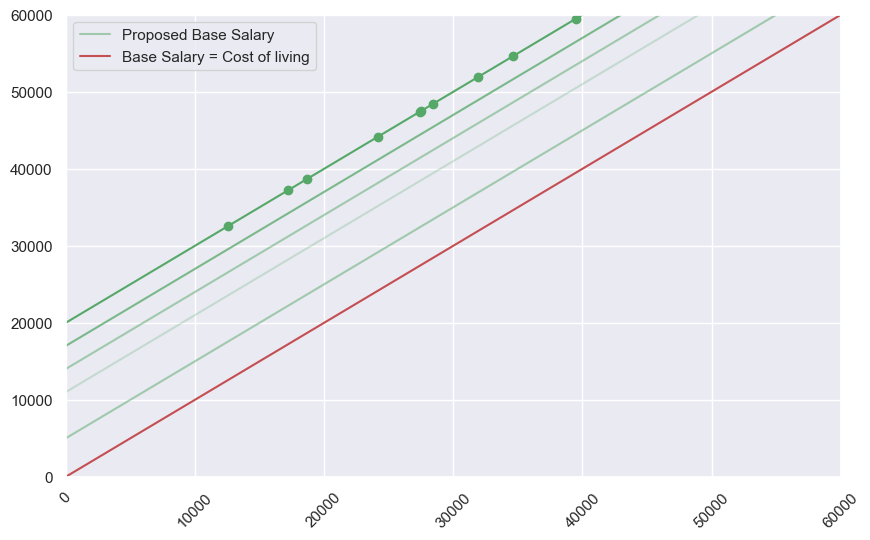

In [15]:
base_increase = 5000
yearly_increase = 3000

monthly_housing_cost = df_avg_cost_change.row(0)
yearly_housing_cost = np.array(monthly_housing_cost) * 12

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

minimum = 0.0001
alpha = 1

ax.axline([0, base_increase], [1, base_increase+1], color='g', label='Proposed Base Salary', alpha=0.5)



n = 5
alphas = np.linspace(0, 1, n)
cum_yearly_increase = yearly_increase

for (i, alpha) in enumerate(alphas):
    base_increase += yearly_increase
    ax.axline([0, base_increase], [1, base_increase+1], color='g', alpha=alphas[i])

ax.axline([0, 1], [1, 2], color='r', label='Base Salary = Cost of living', alpha=alphas[i])
    
compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = x + base_increase
plt.scatter(x, y, marker='o', color='g')


ax.set(xlim=(0, 60_000), ylim=(0, 60_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()


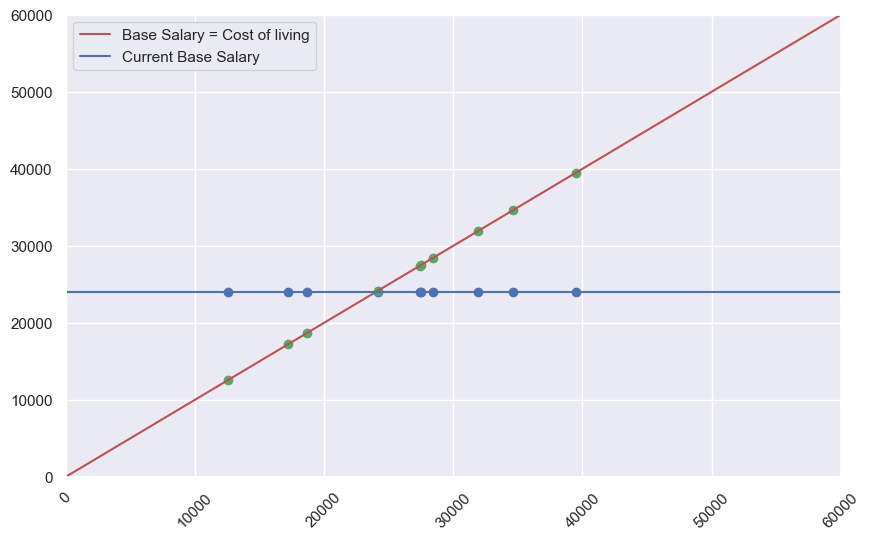

In [16]:
monthly_housing_cost = df_avg_cost_change.row(0)
yearly_housing_cost = np.array(monthly_housing_cost) * 12

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

ax.axline([0, 0], [1, 1], color='r', label='Base Salary = Cost of living')
ax.axhline(y=current_base_salary, color='b', label='Current Base Salary')

compus_name = df_avg_cost_change.columns
x = yearly_housing_cost
y = [current_base_salary] * len(x)
plt.scatter(x, y, marker='o', color='b')

compus_name = df_avg_cost_change.columns
x = np.array(df_avg_cost_change.row(0)) * 12
y = x
plt.scatter(x, y, marker='o', color='g')

ax.set(xlim=(0, 60_000), ylim=(0, 60_000))
ax.legend()
plt.xticks(rotation=45)
plt.show()


## Rough uncertainty estimate

In [17]:
def after_cola_rent_burden_percentage(
        current_base_salary: int = 24_000,
        proposed_increase_base: int = 30_000,
        yearly_increase_percentage: float = 0.07,
        add_sigma_A: int = 0,
        add_sigma_B: float = 0.00,
        max_cola_base: int = 5000,  # USD per year    # this amount will be redistributed based on cost of living
        max_cola_increase: float = 0.00               # this amount will be redistributed based on cost of living
    ):
    """
    current_base_salary: our current salary (USD)
    proposed_increase_base: proposed increase of salary (USD)
    yearly_increase_percentage: proposed yearly salary increase (0.01 means 1%)
    add_sigma_A : Gasusian uncertainty over the monthly cost-of-living data (USD)
    add_sigma_B : Gaussian uncertainty over the yearly cost-of-living increase (0.01 means 1%)

    max_cola_base: the maximum amount of proposed-base-salary-increase money we want to re-distribute based on regional cost-of-living.
        I assume the proposed_increase_base will be minus max_cola_base and
        max_cola_base * (number of campuses) will be re-distributed.
        Note it is not entirely right since you need to account for the campus size. Leave for others to do.
    max_cola_increase: the maximum amount of yearly_increase_percentage we want to re-distribute based on regional cost-of-living.
    """
    # cost_of_living_per_campus_in_5_years = cost_of_living_increase_per_campus * 
    current_cost_of_living_per_campus = np.array(df_avg_cost_change.row(0))
    cost_of_living_increase_per_campus = (1 + np.array(df_avg_cost_change.row(2)) * 0.01)
    cost_of_living_per_campus_in_5_years = current_cost_of_living_per_campus * cost_of_living_increase_per_campus

    print("Campuses:", df_avg_cost_change.columns)
    print("----")
    print("Before:\n", df_avg_cost_change.row(0))
    print("After increase:\n", cost_of_living_per_campus_in_5_years)


    # # Additional uncertainty on the house price
    # add_sigma_A = 0 #400
    # # Additional uncertainty on the cost of living increase
    # add_sigma_B = 0.00

    # a rough estimate of the uncertainty for 
    # cost_of_living_per_campus_in_5_years = current_cost_of_living_per_campus * cost_of_living_increase_per_campus
    # suppose
    # f                                    = A                                 * B
    # sigma_f^2                            = f^2 ( (sigma_A / A)^2 + (sigma_B / B)^2 )
    # by assuming no covariance between A and B
    sigma_A  = np.array(df_avg_cost_change.row(1))         + add_sigma_A
    sigma_B  = np.array(df_avg_cost_change.row(3)) * 0.01  + add_sigma_B
    sigma_f  =np.sqrt(  cost_of_living_per_campus_in_5_years**2 * 
        ((sigma_A / current_cost_of_living_per_campus)**2 + (sigma_B / cost_of_living_increase_per_campus)**2)
    )

    print("1-sigma uncertainty over the cost of living in five years:\n", sigma_f)

    print("\n")

    # calculate base 54k and 7% increase in 5 years
    # current_base_salary = 24_000
    # proposed_increase_base = 30_000
    # yearly_increase_percentage = 0.07

    salary_in_5_years = (current_base_salary + proposed_increase_base) * (1 + yearly_increase_percentage)**5

    print("Salary in 5 years with proposed based salary {:.2g} and increase {:.2g} yearly = {:.2g}.".format(
        current_base_salary + proposed_increase_base,
        yearly_increase_percentage,
        salary_in_5_years)
    )
    # calc how likely you are rent burden in each campus in 5 years
    mc_samples_cost_living_per_campus = []
    for loc, scale in zip(cost_of_living_per_campus_in_5_years, sigma_f):
        mc_samples_cost_living = norm.rvs(
            loc=loc, 
            scale=scale, 
            size=10_000, 
            random_state=42
        )
        mc_samples_cost_living_per_campus.append(mc_samples_cost_living)

    # need to get the rent burden percentage per campus
    rent_burden_per_campus = []
    for campus_name, mc_samples in zip(df_avg_cost_change.columns, mc_samples_cost_living_per_campus):
        # rent shouldn't be higher than 1/3 of salary
        rent_basis = salary_in_5_years * (1 / 3) 
        # if mc samples are larger, than rent burden
        rent_burden_percentage = rent_basis < (mc_samples * 12) # for 12 months
        rent_burden_percentage = rent_burden_percentage.sum() / len(rent_burden_percentage)
        print("Rent burden probability {:.4g} | Campus {}.".format(rent_burden_percentage, campus_name))
        rent_burden_per_campus.append(rent_burden_percentage)
    print("=> Average rent burden before COLA: {:.4g}".format(rent_burden_percentage.mean()))

    print("\n")

    # COLA per campus
    # ---
    # Let's not go to extreme. We assume there's a maximum amount for COLA
    # for base salary or increase.
    # The maximum COLA on the base salary
    # TODO: you should take into account the campus size
    # max_cola_base = 5000      # this amount will be redistributed based on cost of living
    # max_cola_increase = 0.00 # this amount will be redistributed based on cost of living
    print("COLA base salary maximum:", max_cola_base)
    print("COLA yearly salary increase maximum:", max_cola_increase)

    proposed_increase_base_per_campus = (
        (proposed_increase_base - max_cola_base)
        + len(df_avg_cost_change.columns) * max_cola_base * (cost_of_living_per_campus_in_5_years) / cost_of_living_per_campus_in_5_years.sum()
    )
    yearly_increase_percentage_per_campus = (
        (yearly_increase_percentage - max_cola_increase) +
        len(df_avg_cost_change.columns) * max_cola_increase * (cost_of_living_per_campus_in_5_years) / cost_of_living_per_campus_in_5_years.sum()
    )

    salary_in_5_years = (current_base_salary +  proposed_increase_base_per_campus) * (1 + yearly_increase_percentage_per_campus)**5

    for campus_name, mc_samples, this_salary, this_base, this_yearly_percentage in zip(
        df_avg_cost_change.columns, mc_samples_cost_living_per_campus, salary_in_5_years,
        proposed_increase_base_per_campus, yearly_increase_percentage_per_campus,
        ):
        # rent shouldn't be higher than 1/3 of salary
        rent_basis = this_salary * (1 / 3) 
        # if mc samples are larger, than rent burden
        rent_burden_percentage = rent_basis < (mc_samples * 12) # for 12 months
        rent_burden_percentage = rent_burden_percentage.sum() / len(rent_burden_percentage)
        print("Rent burden probability {:.4g} | Campus {} | Proposed base {:.4g} | Yearly increase percent {:.4g}.".format
            (
                rent_burden_percentage,
                campus_name,
                this_base + current_base_salary,
                this_yearly_percentage,
            )
        )
        rent_burden_per_campus.append(rent_burden_percentage)
    print("=> Average rent burden after COLA: {:.4g}".format(rent_burden_percentage.mean()))





In [18]:
# COLA for 5000 USD per year
after_cola_rent_burden_percentage(
        current_base_salary = 24_000,
        proposed_increase_base = 30_000,
        yearly_increase_percentage = 0.07,
        add_sigma_A = 0,
        add_sigma_B = 0.00,
        max_cola_base = 5000,  # USD per year    # this amount will be redistributed based on cost of living
        max_cola_increase = 0.00               # this amount will be redistributed based on cost of living
    )

Campuses: ['Oakland-Fremont', 'San Francisco', 'Santa Cruz', 'Merced', 'Los Angeles', 'Davis', 'Irvine', 'Riverside', 'San Diego', 'Santa Barbara']
----
Before:
 (2285.4, 3289.6, 2882.0, 1043.2, 2014.2, 1558.4, 2289.4, 1434.2, 2662.0, 2366.4)
After increase:
 [2359.21842 3301.44256 3112.8482  1151.37984 2127.19662 1689.3056
 2420.58262 1567.15034 2783.9196  2563.04784]
1-sigma uncertainty over the cost of living in five years:
 [167.36794629 295.41186577 471.78128056 176.43985991 189.9816034
 230.97002904 218.47788028 235.59764749 202.16237029 339.30375527]


Salary in 5 years with proposed based salary 5.4e+04 and increase 0.07 yearly = 7.6e+04.
Rent burden probability 0.9363 | Campus Oakland-Fremont.
Rent burden probability 1 | Campus San Francisco.
Rent burden probability 0.9842 | Campus Santa Cruz.
Rent burden probability 0 | Campus Merced.
Rent burden probability 0.5483 | Campus Los Angeles.
Rent burden probability 0.0367 | Campus Davis.
Rent burden probability 0.9262 | Campus Irv

In [19]:
# COLA for 10000 USD per year
after_cola_rent_burden_percentage(
        current_base_salary = 24_000,
        proposed_increase_base = 30_000,
        yearly_increase_percentage = 0.07,
        add_sigma_A = 0,
        add_sigma_B = 0.00,
        max_cola_base = 10_000,  # USD per year    # this amount will be redistributed based on cost of living
        max_cola_increase = 0.00               # this amount will be redistributed based on cost of living
    )

Campuses: ['Oakland-Fremont', 'San Francisco', 'Santa Cruz', 'Merced', 'Los Angeles', 'Davis', 'Irvine', 'Riverside', 'San Diego', 'Santa Barbara']
----
Before:
 (2285.4, 3289.6, 2882.0, 1043.2, 2014.2, 1558.4, 2289.4, 1434.2, 2662.0, 2366.4)
After increase:
 [2359.21842 3301.44256 3112.8482  1151.37984 2127.19662 1689.3056
 2420.58262 1567.15034 2783.9196  2563.04784]
1-sigma uncertainty over the cost of living in five years:
 [167.36794629 295.41186577 471.78128056 176.43985991 189.9816034
 230.97002904 218.47788028 235.59764749 202.16237029 339.30375527]


Salary in 5 years with proposed based salary 5.4e+04 and increase 0.07 yearly = 7.6e+04.
Rent burden probability 0.9363 | Campus Oakland-Fremont.
Rent burden probability 1 | Campus San Francisco.
Rent burden probability 0.9842 | Campus Santa Cruz.
Rent burden probability 0 | Campus Merced.
Rent burden probability 0.5483 | Campus Los Angeles.
Rent burden probability 0.0367 | Campus Davis.
Rent burden probability 0.9262 | Campus Irv

In [20]:
# Consider the uncertainty of the data we have
# I assume there is a 200 USD per month uncertainty on average

after_cola_rent_burden_percentage(
        current_base_salary = 24_000,
        proposed_increase_base = 30_000,
        yearly_increase_percentage = 0.07,
        add_sigma_A = 200,
        add_sigma_B = 0.00,
        max_cola_base = 10_000,  # USD per year    # this amount will be redistributed based on cost of living
        max_cola_increase = 0.00               # this amount will be redistributed based on cost of living
    )

Campuses: ['Oakland-Fremont', 'San Francisco', 'Santa Cruz', 'Merced', 'Los Angeles', 'Davis', 'Irvine', 'Riverside', 'San Diego', 'Santa Barbara']
----
Before:
 (2285.4, 3289.6, 2882.0, 1043.2, 2014.2, 1558.4, 2289.4, 1434.2, 2662.0, 2366.4)
After increase:
 [2359.21842 3301.44256 3112.8482  1151.37984 2127.19662 1689.3056
 2420.58262 1567.15034 2783.9196  2563.04784]
1-sigma uncertainty over the cost of living in five years:
 [344.98362836 439.06693257 668.73897946 394.79752964 388.53621208
 445.49587014 417.59880379 449.09824981 404.28564241 536.44695654]


Salary in 5 years with proposed based salary 5.4e+04 and increase 0.07 yearly = 7.6e+04.
Rent burden probability 0.7687 | Campus Oakland-Fremont.
Rent burden probability 0.9963 | Campus San Francisco.
Rent burden probability 0.9336 | Campus Santa Cruz.
Rent burden probability 0.0083 | Campus Merced.
Rent burden probability 0.5245 | Campus Los Angeles.
Rent burden probability 0.1771 | Campus Davis.
Rent burden probability 0.7735 |

In [21]:
# Consider the uncertainty of the data we have
# I assume there is a 400 USD per month uncertainty on average

after_cola_rent_burden_percentage(
        current_base_salary = 24_000,
        proposed_increase_base = 30_000,
        yearly_increase_percentage = 0.07,
        add_sigma_A = 400,
        add_sigma_B = 0.00,
        max_cola_base = 10_000,  # USD per year    # this amount will be redistributed based on cost of living
        max_cola_increase = 0.00               # this amount will be redistributed based on cost of living
    )

Campuses: ['Oakland-Fremont', 'San Francisco', 'Santa Cruz', 'Merced', 'Los Angeles', 'Davis', 'Irvine', 'Riverside', 'San Diego', 'Santa Barbara']
----
Before:
 (2285.4, 3289.6, 2882.0, 1043.2, 2014.2, 1558.4, 2289.4, 1434.2, 2662.0, 2366.4)
After increase:
 [2359.21842 3301.44256 3112.8482  1151.37984 2127.19662 1689.3056
 2420.58262 1567.15034 2783.9196  2563.04784]
1-sigma uncertainty over the cost of living in five years:
 [543.38461649 615.5228744  874.74301906 614.85888613 595.86537352
 661.50621034 624.88046928 665.87663096 611.16278401 744.49451631]


Salary in 5 years with proposed based salary 5.4e+04 and increase 0.07 yearly = 7.6e+04.
Rent burden probability 0.6796 | Campus Oakland-Fremont.
Rent burden probability 0.9731 | Campus San Francisco.
Rent burden probability 0.8756 | Campus Santa Cruz.
Rent burden probability 0.0611 | Campus Merced.
Rent burden probability 0.5155 | Campus Los Angeles.
Rent burden probability 0.2637 | Campus Davis.
Rent burden probability 0.693 | 

With roughly 10000 COLA, the average rent burden can decrease ~ 2%

In [22]:
df_avg_cost_change

Oakland-Fremont,San Francisco,Santa Cruz,Merced,Los Angeles,Davis,Irvine,Riverside,San Diego,Santa Barbara
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2285.4,3289.6,2882.0,1043.2,2014.2,1558.4,2289.4,1434.2,2662.0,2366.4
113.49,161.89,381.38,155.99,157.47,208.75,183.25,206.08,180.19,267.93
3.23,0.36,8.01,10.37,5.61,8.4,5.73,9.27,4.58,8.31
5.23,7.5,7.98,3.7,4.56,2.97,4.41,4.83,2.75,7.43
